In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
#drop unneccesarry columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


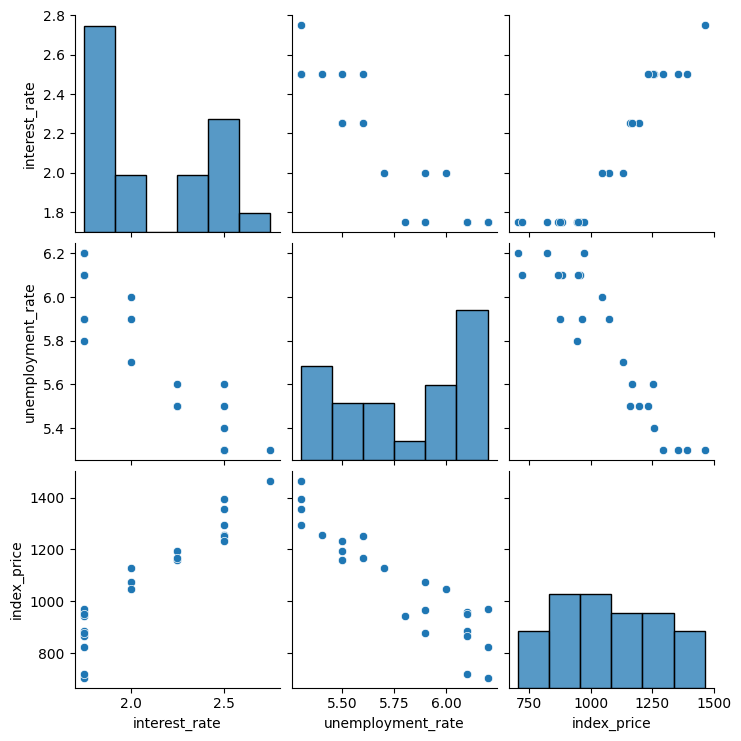

In [10]:
#visulization
import seaborn as sns
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

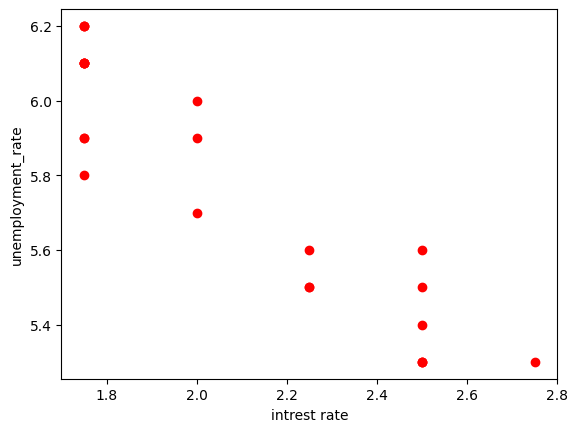

In [16]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("intrest rate")
plt.ylabel("unemployment_rate")

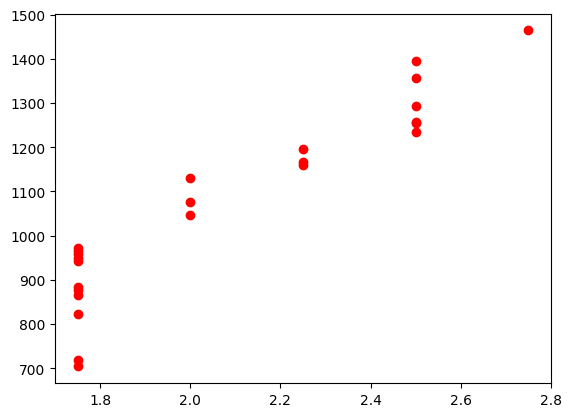

In [17]:
plt.scatter(df['interest_rate'],df['index_price'],color='r')


In [33]:
# Drop unnecessary columns
X = df[['interest_rate', 'unemployment_rate']]  # Features
y = df['index_price']  # Target

In [34]:
#train test split
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


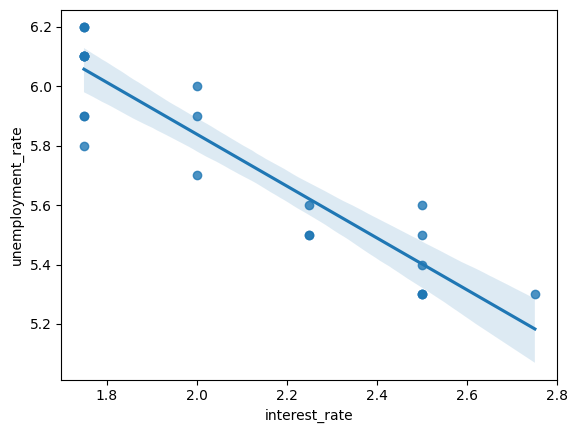

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the regression plot
sns.regplot(x=df['interest_rate'], y=df['index_price'])

# Show the plot
plt.show()


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

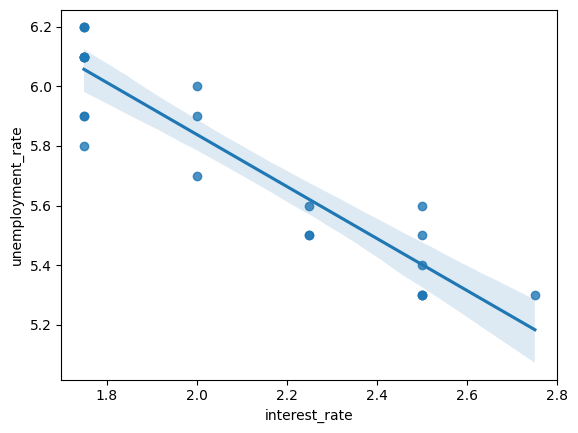

In [40]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])


In [41]:
#standardlization
from sklearn.preprocessing import StandardScaler


In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [45]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [47]:
regression.fit(X_train,y_train)


LinearRegression()

In [48]:
#cross validation
from sklearn.model_selection import cross_val_score
validationscore=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [49]:
##prediction
y_pred=regression.predict(X_test)

In [50]:
y_pred



array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [52]:
#perfomance metrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8278978091457145

In [54]:
#OLS
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()



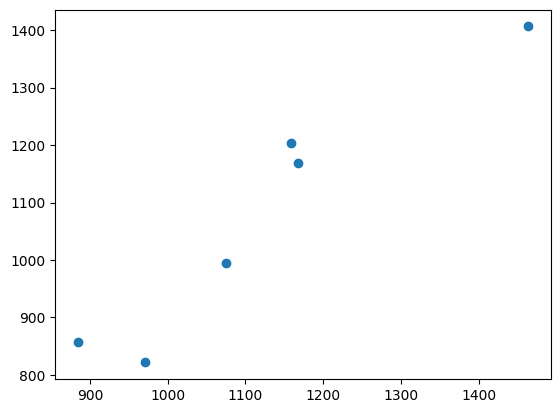

In [55]:
#assumptions
plt.scatter(y_test,y_pred)

In [56]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


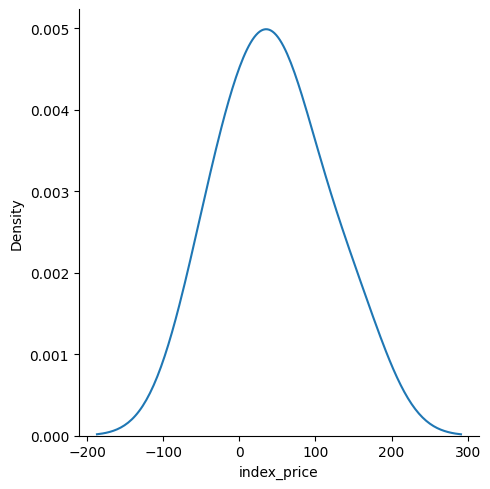

In [58]:
sns.displot(residuals,kind='kde')

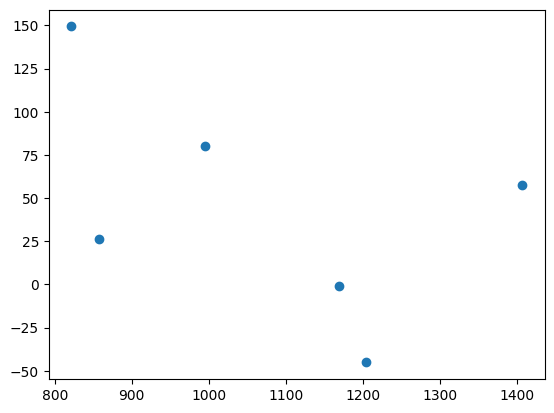

In [59]:
plt.scatter(y_pred,residuals)

In [61]:
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 22 Jan 2025   Prob (F-statistic):                       0.754
Time:                        14:47:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
print(regression.coef_)

[  88.27275507 -116.25716066]
